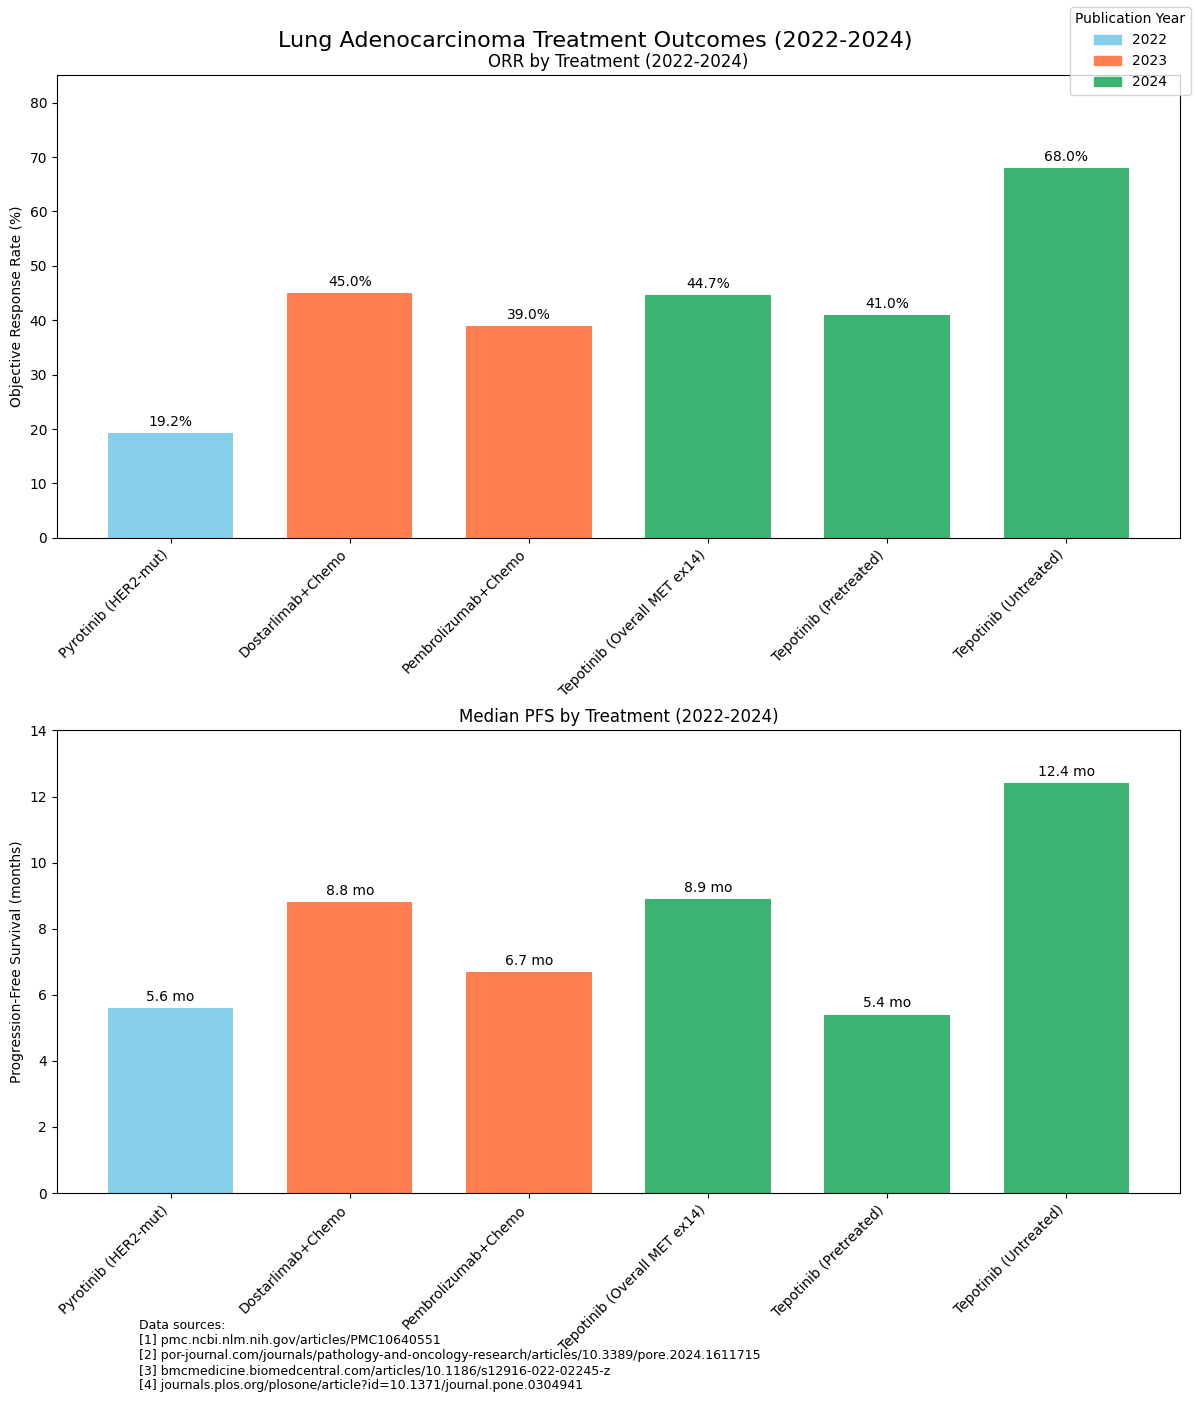

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Setting up the data from clinical trials (2022-2024)
years = [2022, 2023, 2023, 2024, 2024, 2024]
treatments = [
    'Pyrotinib (HER2-mut)',
    'Dostarlimab+Chemo',
    'Pembrolizumab+Chemo',
    'Tepotinib (Overall MET ex14)',
    'Tepotinib (Pretreated)',
    'Tepotinib (Untreated)'
]
orr_values = [19.2, 45.0, 39.0, 44.7, 41.0, 68.0]  # Objective Response Rate (%)
pfs_values = [5.6, 8.8, 6.7, 8.9, 5.4, 12.4]       # Progression-Free Survival (months)

# Citations for data sources
citations = [
    "bmcmedicine.biomedcentral.com/articles/10.1186/s12916-022-02245-z",
    "pmc.ncbi.nlm.nih.gov/articles/PMC10640551",
    "pmc.ncbi.nlm.nih.gov/articles/PMC10640551",
    "por-journal.com/journals/pathology-and-oncology-research/articles/10.3389/pore.2024.1611715",
    "por-journal.com/journals/pathology-and-oncology-research/articles/10.3389/pore.2024.1611715",
    "por-journal.com/journals/pathology-and-oncology-research/articles/10.3389/pore.2024.1611715"
]

# Create DataFrame
df = pd.DataFrame({
    'Year': years,
    'Treatment': treatments,
    'ORR (%)': orr_values,
    'PFS (months)': pfs_values,
    'Citation': citations
})

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 14))
fig.suptitle('Lung Adenocarcinoma Treatment Outcomes (2022-2024)', fontsize=16)

# Colors by year
colors = {2022: 'skyblue', 2023: 'coral', 2024: 'mediumseagreen'}
bar_colors = [colors[year] for year in years]

# ORR Plot
x = np.arange(len(treatments))
width = 0.7
bars1 = ax1.bar(x, orr_values, width, color=bar_colors)
ax1.set_ylabel('Objective Response Rate (%)')
ax1.set_title('ORR by Treatment (2022-2024)')
ax1.set_xticks(x)
ax1.set_xticklabels(treatments, rotation=45, ha='right')
ax1.set_ylim(0, 85)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# PFS Plot
bars2 = ax2.bar(x, pfs_values, width, color=bar_colors)
ax2.set_ylabel('Progression-Free Survival (months)')
ax2.set_title('Median PFS by Treatment (2022-2024)')
ax2.set_xticks(x)
ax2.set_xticklabels(treatments, rotation=45, ha='right')
ax2.set_ylim(0, 14)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height} mo',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Legend
legend_elements = [plt.Rectangle((0,0),1,1, color=colors[year], label=f'{year}')
                  for year in sorted(set(years))]
fig.legend(handles=legend_elements, loc='upper right', title="Publication Year")

# Citations
citations_text = "Data sources:\n"
citations_text += "[1] pmc.ncbi.nlm.nih.gov/articles/PMC10640551\n"
citations_text += "[2] por-journal.com/journals/pathology-and-oncology-research/articles/10.3389/pore.2024.1611715\n"
citations_text += "[3] bmcmedicine.biomedcentral.com/articles/10.1186/s12916-022-02245-z\n"
citations_text += "[4] journals.plos.org/plosone/article?id=10.1371/journal.pone.0304941"

fig.text(0.12, 0.01, citations_text, fontsize=9)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

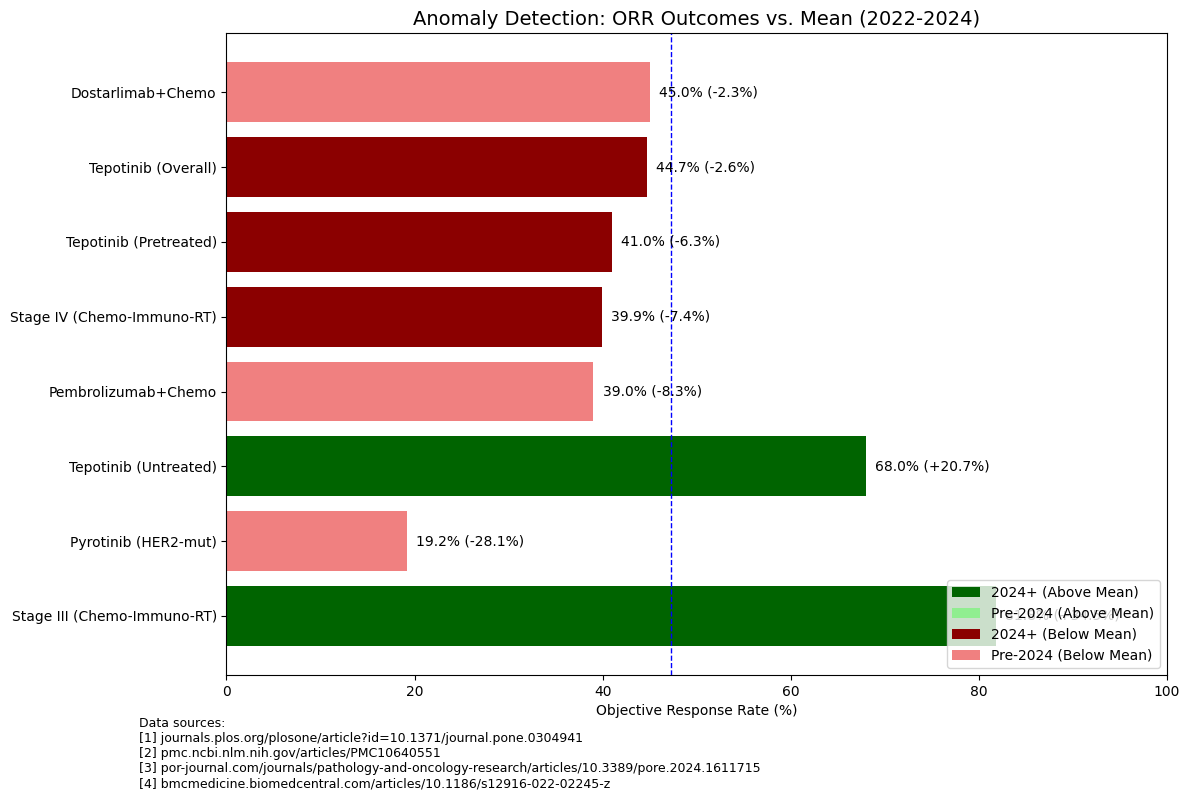

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Patch

# Lung adenocarcinoma clinical data by disease stage and treatment type
treatments = [
    'Stage III (Chemo-Immuno-RT)',
    'Stage IV (Chemo-Immuno-RT)',
    'Dostarlimab+Chemo',
    'Pembrolizumab+Chemo',
    'Tepotinib (Overall)',
    'Tepotinib (Untreated)',
    'Tepotinib (Pretreated)',
    'Pyrotinib (HER2-mut)'
]

years = [2024, 2024, 2023, 2023, 2024, 2024, 2024, 2022]
orr_values = [81.8, 39.9, 45.0, 39.0, 44.7, 68.0, 41.0, 19.2]  # Objective Response Rate (%)

# Calculate the mean ORR as a reference point
mean_orr = np.mean(orr_values)

# Sort data by deviation from mean (to highlight anomalies)
deviation = np.abs(np.array(orr_values) - mean_orr)
sorted_indices = np.argsort(deviation)[::-1]  # Reverse to get largest deviations first

sorted_treatments = [treatments[i] for i in sorted_indices]
sorted_orr = [orr_values[i] for i in sorted_indices]
sorted_years = [years[i] for i in sorted_indices]

# Create color-coding based on year and whether it's above/below mean
colors = []
for i in range(len(sorted_indices)):
    if sorted_orr[i] > mean_orr:
        colors.append('darkgreen' if sorted_years[i] >= 2024 else 'lightgreen')
    else:
        colors.append('darkred' if sorted_years[i] >= 2024 else 'lightcoral')

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars
bars = ax.barh(sorted_treatments, sorted_orr, color=colors)

# Add a reference line for the mean
ax.axvline(x=mean_orr, color='blue', linestyle='--', linewidth=1, label=f'Mean ORR: {mean_orr:.1f}%')

# Add labels showing deviation from mean
for i, bar in enumerate(bars):
    width = bar.get_width()
    dev = sorted_orr[i] - mean_orr
    label = f'{sorted_orr[i]}% ({dev:+.1f}%)'
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, label, ha='left', va='center')

# Set title and labels
ax.set_title('Anomaly Detection: ORR Outcomes vs. Mean (2022-2024)', fontsize=14)
ax.set_xlabel('Objective Response Rate (%)')
ax.set_xlim(0, 100)

# Create legend
legend_elements = [
    Patch(facecolor='darkgreen', label='2024+ (Above Mean)'),
    Patch(facecolor='lightgreen', label='Pre-2024 (Above Mean)'),
    Patch(facecolor='darkred', label='2024+ (Below Mean)'),
    Patch(facecolor='lightcoral', label='Pre-2024 (Below Mean)')
]
ax.legend(handles=legend_elements, loc='lower right')

# Add citation information
citations_text = "Data sources:\n"
citations_text += "[1] journals.plos.org/plosone/article?id=10.1371/journal.pone.0304941\n"
citations_text += "[2] pmc.ncbi.nlm.nih.gov/articles/PMC10640551\n"
citations_text += "[3] por-journal.com/journals/pathology-and-oncology-research/articles/10.3389/pore.2024.1611715\n"
citations_text += "[4] bmcmedicine.biomedcentral.com/articles/10.1186/s12916-022-02245-z"

plt.figtext(0.12, 0.01, citations_text, fontsize=9)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

<ipython-input-3-da05f226638a>:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('viridis')


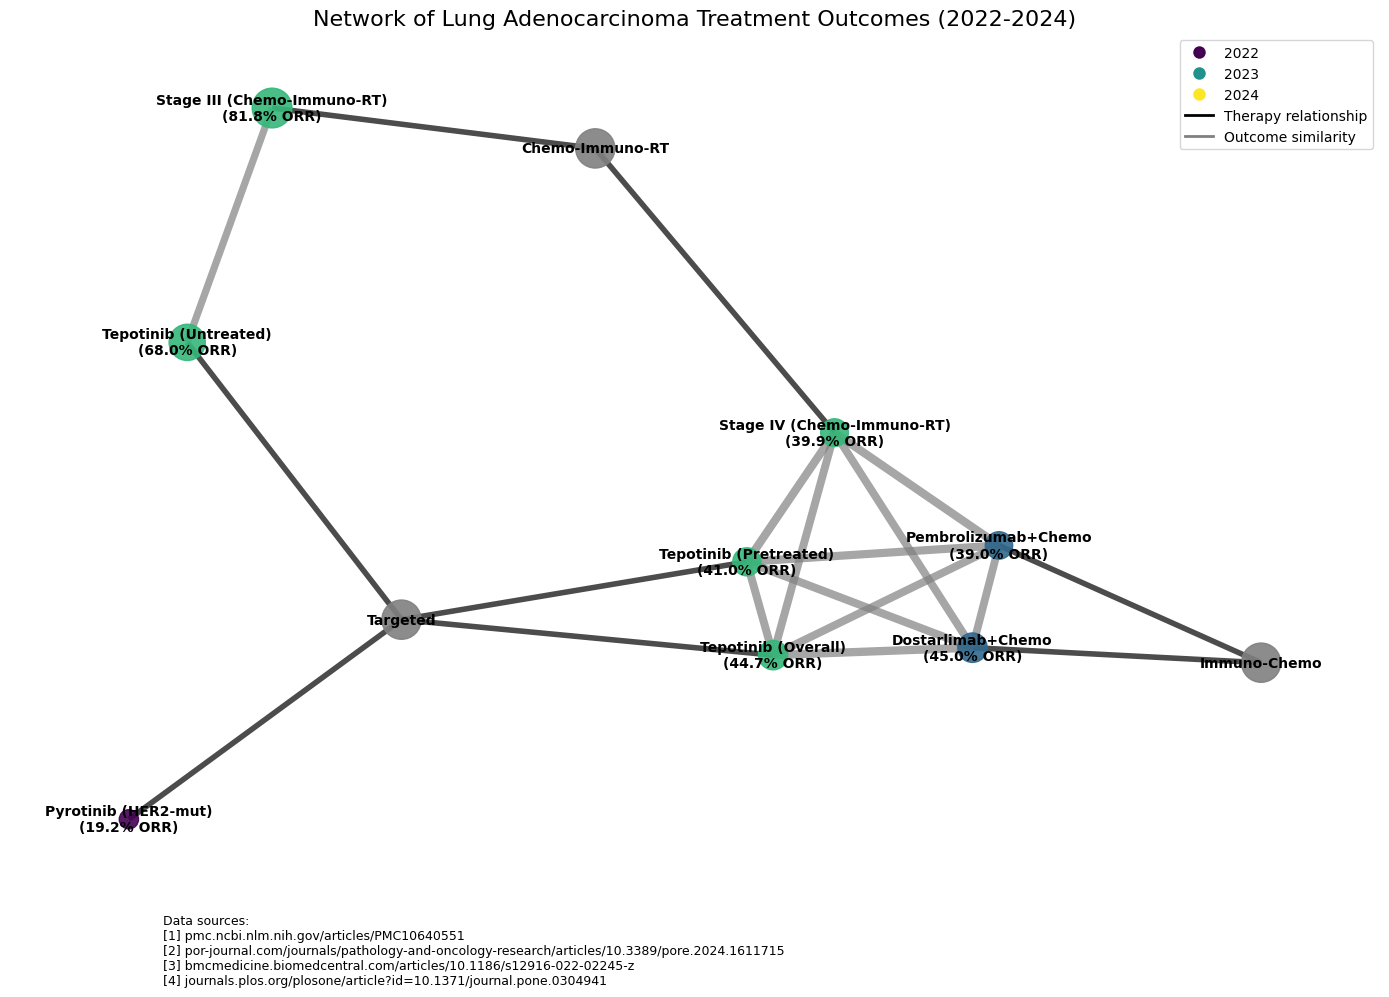

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from matplotlib.cm import get_cmap

# Clinical data from lung adenocarcinoma trials (2022-2024)
data = {
    'Treatment': [
        'Pyrotinib (HER2-mut)',
        'Dostarlimab+Chemo',
        'Pembrolizumab+Chemo',
        'Tepotinib (Overall)',
        'Tepotinib (Pretreated)',
        'Tepotinib (Untreated)',
        'Stage III (Chemo-Immuno-RT)',
        'Stage IV (Chemo-Immuno-RT)'
    ],
    'Year': [2022, 2023, 2023, 2024, 2024, 2024, 2024, 2024],
    'ORR (%)': [19.2, 45.0, 39.0, 44.7, 41.0, 68.0, 81.8, 39.9],
    'PFS': [5.6, 8.8, 6.7, 8.9, 5.4, 12.4, None, None],
    '1Y-PFS (%)': [None, None, None, None, None, None, 68.2, 27.9],
    'Therapy_Type': [
        'Targeted',
        'Immuno-Chemo',
        'Immuno-Chemo',
        'Targeted',
        'Targeted',
        'Targeted',
        'Chemo-Immuno-RT',
        'Chemo-Immuno-RT'
    ]
}

df = pd.DataFrame(data)

# Create a graph
G = nx.Graph()

# Add therapy type nodes
therapy_types = set(df['Therapy_Type'])
for therapy in therapy_types:
    G.add_node(therapy, type='therapy')

# Add treatment nodes and connect to therapy types
for i, row in df.iterrows():
    treatment = row['Treatment']
    therapy = row['Therapy_Type']
    year = row['Year']
    orr = row['ORR (%)']

    # Add treatment node with attributes
    G.add_node(treatment,
               type='treatment',
               year=year,
               orr=orr,
               pfs=row['PFS'],
               pfs_1y=row['1Y-PFS (%)'])

    # Connect treatment to therapy type
    G.add_edge(treatment, therapy, weight=2)

# Connect treatments with similar outcomes
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i < j:  # Avoid duplicate connections
            treatment1 = row1['Treatment']
            treatment2 = row2['Treatment']

            # Calculate similarity based on ORR
            orr_diff = abs(row1['ORR (%)'] - row2['ORR (%)'])

            # Only connect if relatively similar (within 15% ORR difference)
            if orr_diff <= 15:
                similarity = 1 - (orr_diff / 100)  # Normalize to 0-1
                G.add_edge(treatment1, treatment2, weight=similarity*3, type='similarity')

# Create the visualization
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42, k=0.5)  # Position nodes using force-directed layout

# Node sizes based on ORR for treatments
node_sizes = []
node_colors = []
cmap = get_cmap('viridis')
labels = {}

for node in G.nodes():
    if G.nodes[node]['type'] == 'treatment':
        orr = G.nodes[node]['orr']
        year = G.nodes[node]['year']

        # Size based on ORR
        node_sizes.append(orr * 10)

        # Color based on year
        color_val = (year - 2022) / 3  # Normalize 2022-2024 to 0-1
        node_colors.append(cmap(color_val))

        # Label with ORR
        labels[node] = f"{node}\n({orr}% ORR)"
    else:
        # Therapy type nodes
        node_sizes.append(800)
        node_colors.append('gray')
        labels[node] = node

# Draw edges with varying thickness
edges = G.edges()
weights = [G[u][v]['weight']*2 for u, v in edges]
edge_colors = ['gray' if G[u][v].get('type') == 'similarity' else 'black' for u, v in edges]

nx.draw_networkx_edges(G, pos, width=weights, alpha=0.7, edge_color=edge_colors)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)

# Draw labels
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')

# Title and legend
plt.title('Network of Lung Adenocarcinoma Treatment Outcomes (2022-2024)', fontsize=16)

# Create a custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(0), markersize=10, label='2022'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(0.5), markersize=10, label='2023'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(1.0), markersize=10, label='2024'),
    plt.Line2D([0], [0], color='black', lw=2, label='Therapy relationship'),
    plt.Line2D([0], [0], color='gray', lw=2, label='Outcome similarity')
]
plt.legend(handles=legend_elements, loc='upper right')

# Citation information
citations_text = "Data sources:\n"
citations_text += "[1] pmc.ncbi.nlm.nih.gov/articles/PMC10640551\n"
citations_text += "[2] por-journal.com/journals/pathology-and-oncology-research/articles/10.3389/pore.2024.1611715\n"
citations_text += "[3] bmcmedicine.biomedcentral.com/articles/10.1186/s12916-022-02245-z\n"
citations_text += "[4] journals.plos.org/plosone/article?id=10.1371/journal.pone.0304941"

plt.figtext(0.12, 0.01, citations_text, fontsize=9)

plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()